# Boston Crime Analysis

## Importing Libraries

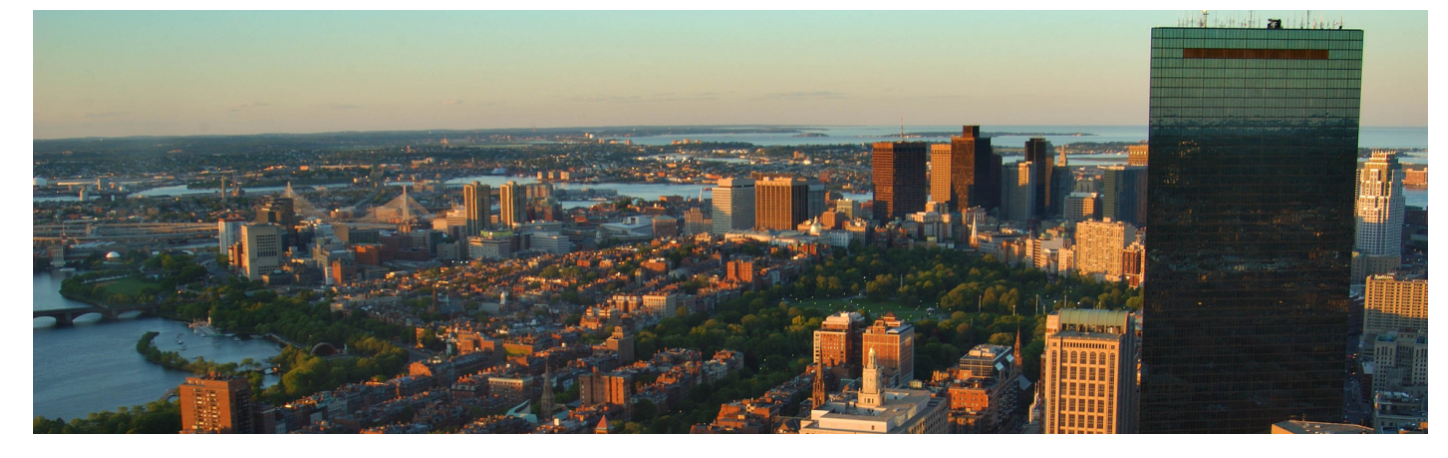

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
import json
import geocoder
import seaborn as sns

plt.figure(figsize=(25,15))
img = np.array(Image.open("BostonCover.jpg"))
plt.imshow(img,interpolation="bilinear")
plt.axis("off")
plt.show()

In [2]:
data = pd.read_csv('crime.csv',encoding = 'ISO-8859-1',dtype='unicode')
dataframe = pd.DataFrame(data)

## Data Transformation

In [3]:
dataframe["Lat"] = pd.to_numeric(dataframe["Lat"])
dataframe["Long"] = pd.to_numeric(dataframe["Long"])
dataframe

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,10/3/2018 20:13,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,8/30/2018 20:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,10/3/2018 19:20,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,10/3/2018 20:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,10/3/2018 20:49,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
5,I182080049,1402,Vandalism,VANDALISM,C11,351,NaN,10/2/2018 20:40,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.299197,-71.060470,"(42.29919694, -71.06046974)"
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NaN,10/3/2018 20:16,2018,10,Wednesday,20,Part Three,NaN,42.320734,-71.056764,"(42.32073413, -71.05676415)"
7,I182080047,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,NaN,10/3/2018 19:32,2018,10,Wednesday,19,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)"
8,I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,NaN,10/3/2018 19:27,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.128025,"(42.25614494, -71.12802506)"
9,I182080044,3410,Towed,TOWED MOTOR VEHICLE,D4,621,NaN,10/3/2018 20:00,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.348866,-71.089363,"(42.34886600, -71.08936284)"


In [4]:
mean_lat = dataframe.groupby('STREET', as_index=True)['Lat'].mean()
mean_lat = pd.DataFrame({'Street':mean_lat.index,'Lat':mean_lat.values})
mean_lat.drop(mean_lat[mean_lat.Lat == -1].index, inplace=True)
mean_lat.set_index('Street', inplace=True)
mean_lat.dropna(how='all',inplace=True)
mean_lat.sort_values(by=['Street'])
mean_lat_df = mean_lat
mean_lat = mean_lat.to_dict()
mean_lat

{'Lat': {' ALBANY ST ': 42.333609999999965,
  ' BLUE HILL AVE ': 42.317303700000004,
  ' COLUMBUS AVE ': 42.34060371,
  ' COMMONWEALTH AVE ': 42.35053956000001,
  ' MASSACHUSETTS AVE ': 42.33253100000001,
  'A ST': 42.341112649471334,
  'ABBOT ST': 42.29691806624264,
  'ABBOTSFORD ST': 42.314530184724426,
  'ABBY RD': 42.36140263,
  'ABERDEEN ST': 42.346353440000016,
  'ACADEMY CT': 42.32081964999999,
  'ACADEMY HILL RD': 42.34726990039064,
  'ACADEMY RD': 42.32061024833333,
  'ACADEMY TER': 42.32082221,
  'ACADIA ST': 42.33782826,
  'ACHORN CIR': 42.30800713,
  'ACKLEY PL': 42.31107064333333,
  'ACORN ST': 42.35761285,
  'ADA ST': 42.28122151666667,
  'ADAIR RD': 42.35199540666667,
  'ADAMS ST': 42.297954267733715,
  'ADAMS TER': 42.29547164000001,
  'ADAMSON ST': 42.35808155380954,
  'ADANAC TER': 42.28696614,
  'ADDINGTON RD': 42.28953207599999,
  'ADDISON ST': 42.38568992172412,
  'ADELAIDE ST': 42.3174859285714,
  'ADELAIDE TER': 42.3179676,
  'ADELLA PL': 42.352569821428574,
  'A

In [5]:
mean_long = dataframe.groupby('STREET', as_index=True)['Long'].mean()
mean_long = pd.DataFrame({'Street':mean_long.index,'Long':mean_long.values})
mean_long.drop(mean_long[mean_long.Long == -1].index, inplace=True)
mean_long.set_index('Street', inplace=True)
mean_long.dropna(how='all',inplace=True)
mean_long.sort_values(by=['Street'])
mean_long_df = mean_long
mean_long = mean_long.to_dict()


In [6]:
for index, row in dataframe.iterrows():
    if pd.notnull(row["STREET"]) and pd.isnull(row["Lat"]) and pd.isnull(row["Long"]):
        dataframe.at[index,'Lat'] = mean_lat.get(row["STREET"])
        dataframe.at[index,'Long'] = mean_long.get(row["STREET"])

dataframe.dropna(subset=['STREET','Lat','Long'], thresh=2, inplace=True)
dataframe

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,10/3/2018 20:13,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,8/30/2018 20:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,10/3/2018 19:20,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,10/3/2018 20:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,10/3/2018 20:49,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
5,I182080049,1402,Vandalism,VANDALISM,C11,351,NaN,10/2/2018 20:40,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.299197,-71.060470,"(42.29919694, -71.06046974)"
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NaN,10/3/2018 20:16,2018,10,Wednesday,20,Part Three,NaN,42.320734,-71.056764,"(42.32073413, -71.05676415)"
7,I182080047,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,NaN,10/3/2018 19:32,2018,10,Wednesday,19,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)"
8,I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,NaN,10/3/2018 19:27,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.128025,"(42.25614494, -71.12802506)"
9,I182080044,3410,Towed,TOWED MOTOR VEHICLE,D4,621,NaN,10/3/2018 20:00,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.348866,-71.089363,"(42.34886600, -71.08936284)"


In [7]:
dataframe.to_csv("cleaned_data.csv", index=False)

In [8]:
crime = pd.read_csv('cleaned_data.csv', encoding='latin-1', dtype = 'unicode')

In [9]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,10/3/2018 20:13,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.26260773,-71.12118637,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,8/30/2018 20:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.35211146,-71.13531147,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,10/3/2018 19:20,2018,10,Wednesday,19,Part Two,DEVON ST,42.30812619,-71.07692974,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,10/3/2018 20:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.35945371,-71.05964817,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,10/3/2018 20:49,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.37525782,-71.02466343,"(42.37525782, -71.02466343)"


## Data Plotting

In [10]:
#Locating first 2000 crimes in the table on map
import folium

Boston_Map = (42.34797240, -71.07849582)

m = my_map = folium.Map(location = Boston_Map, zoom_start = 12)

#crime.apply(lambda row:folium.CircleMarker(location=[row["Lat"],row["Long"]]).add_to(my_map),axis=1)
for index, row in crime.head(n = 2000).iterrows():
    folium.CircleMarker(
        location = [float(row['Lat']), float(row['Long'])],
        radius = 5,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)
m

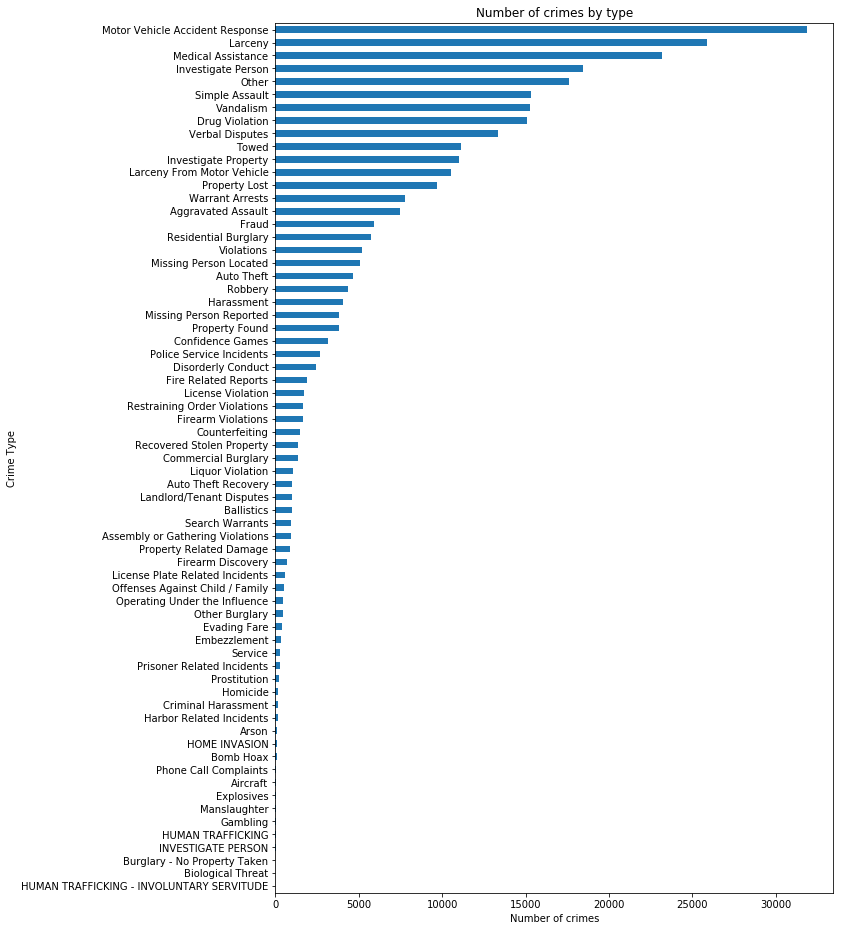

In [11]:
plt.figure(figsize=(10,16))
crime.groupby([crime['OFFENSE_CODE_GROUP']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

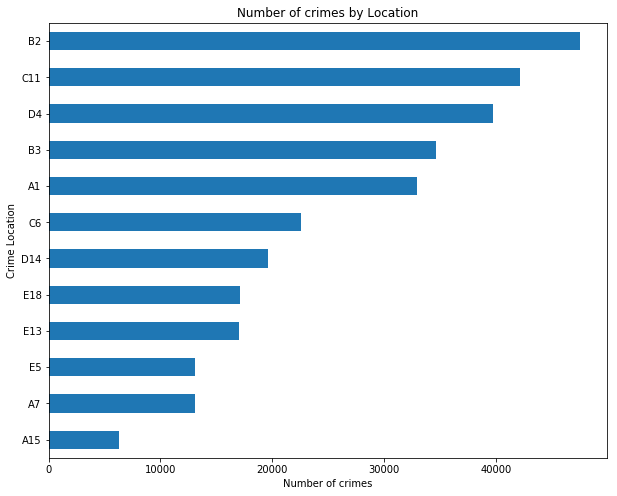

In [12]:
plt.figure(figsize=(10,8))
crime.groupby([crime['DISTRICT']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

In [13]:
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE, format='%m/%d/%Y %H:%M')
crime.index = pd.DatetimeIndex(crime.OCCURRED_ON_DATE)

In [14]:
hour_by_type = crime.pivot_table(values='INCIDENT_NUMBER', index='OFFENSE_CODE_GROUP', columns=crime.index.hour, aggfunc=np.size).fillna(0)

In [15]:
#Agglomerative CLustering used to make better heat maps
from sklearn.cluster import AgglomerativeClustering as AC

def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='coolwarm'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()

def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


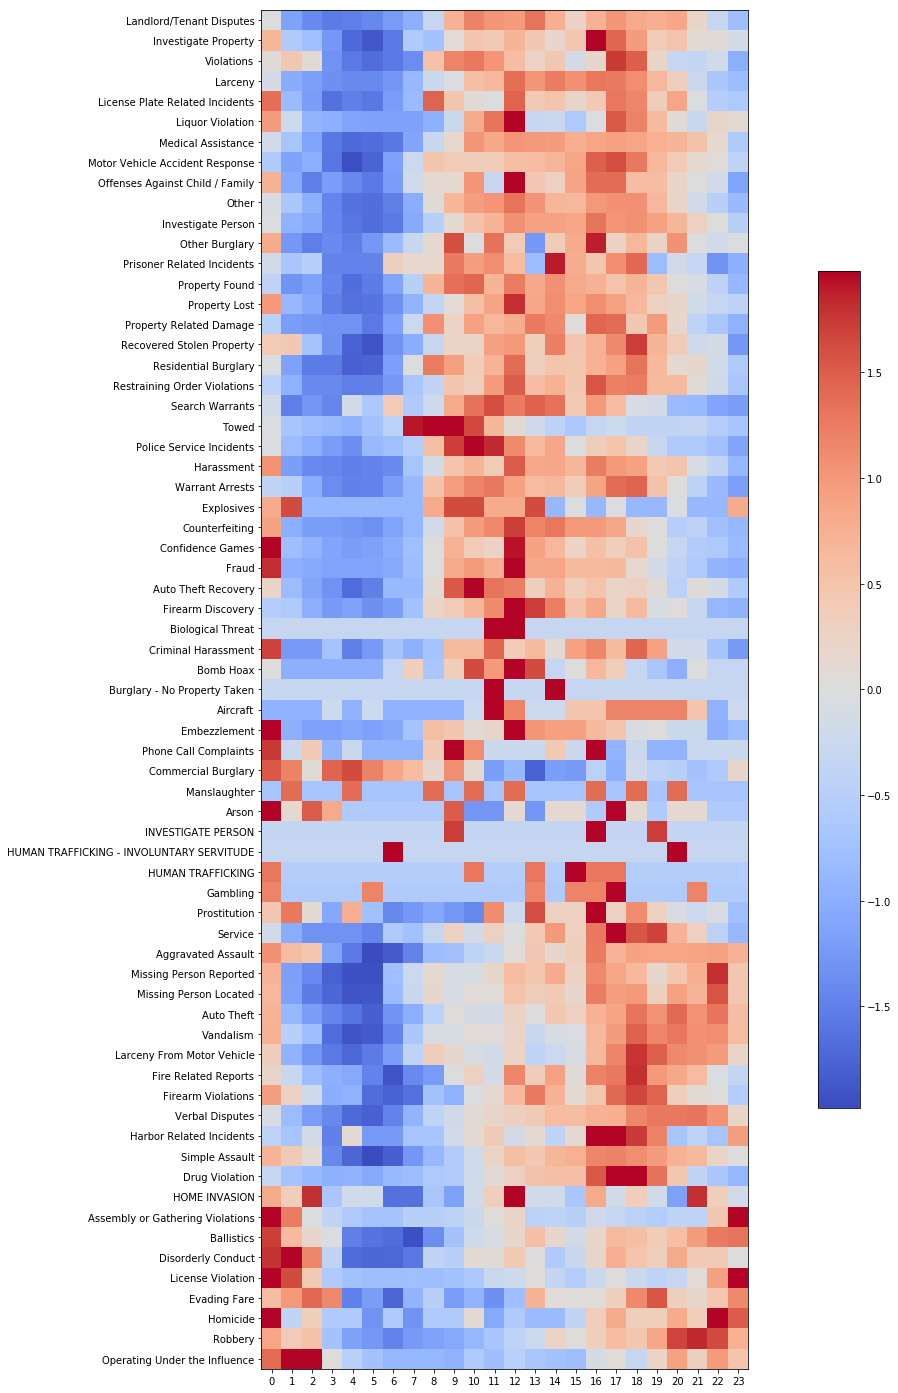

In [16]:
plt.figure(figsize=(25,25))
scale_and_plot(hour_by_type)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


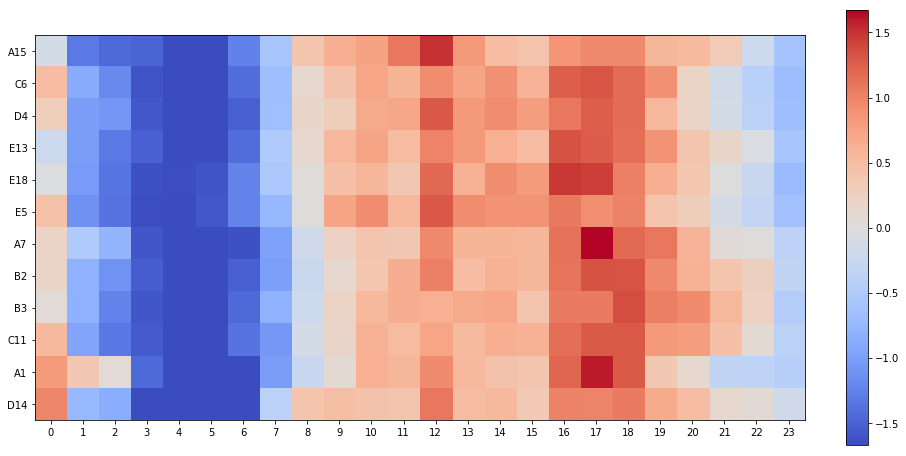

In [17]:
hour_by_location = crime.pivot_table(values='INCIDENT_NUMBER', index='DISTRICT', columns=crime.index.hour, aggfunc=np.size).fillna(0)

plt.figure(figsize=(15,8))
scale_and_plot(hour_by_location)

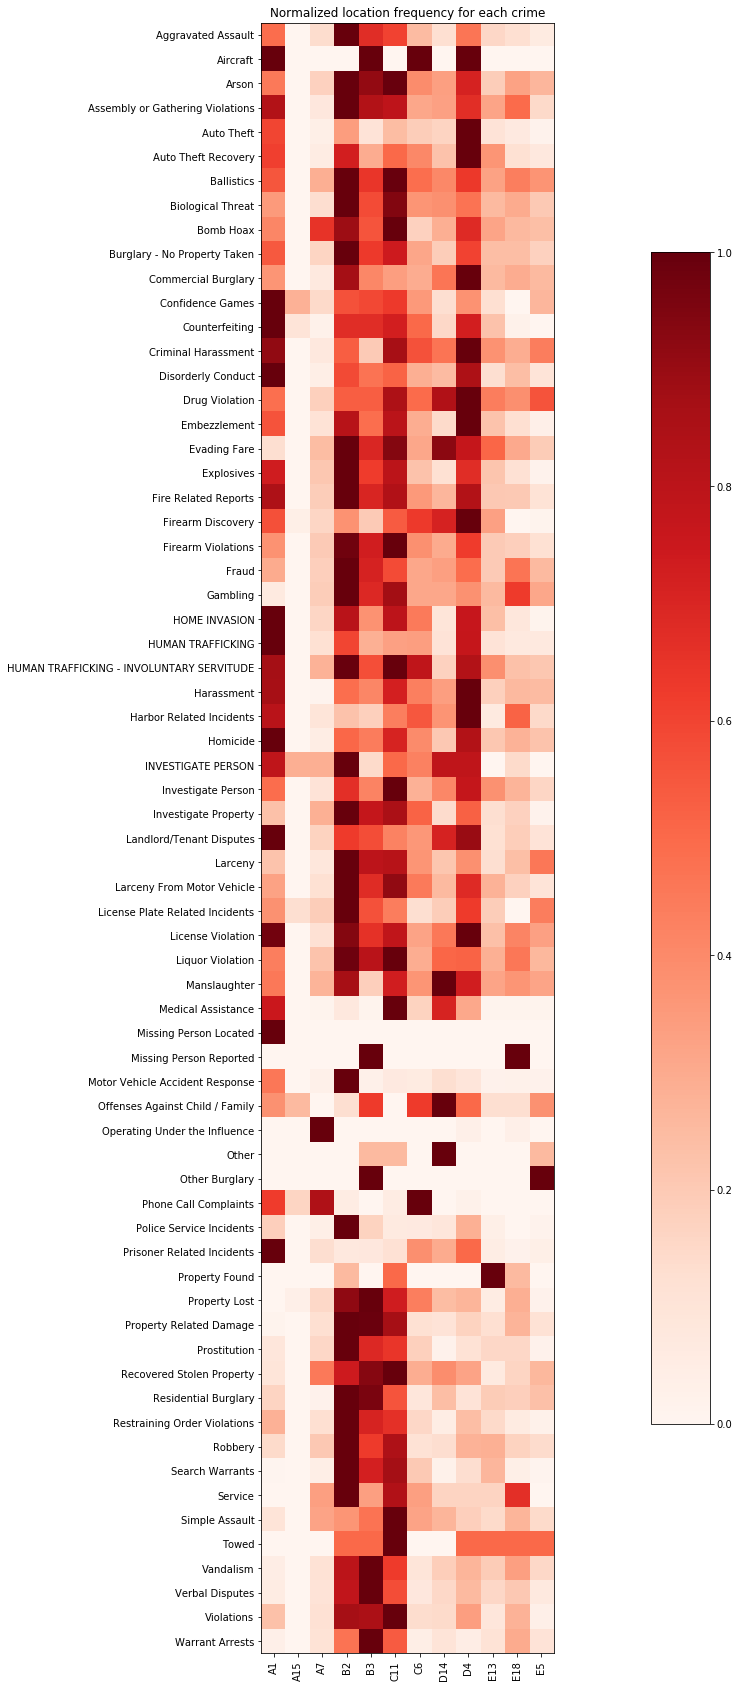

In [18]:
location_by_type = crime.pivot_table(values='INCIDENT_NUMBER', index='DISTRICT', columns='OFFENSE_CODE_GROUP', aggfunc=np.size).fillna(0)

df = normalize(location_by_type)
ix = AC(3).fit(df.T).labels_.argsort()
plt.figure(figsize=(35,30))
plt.imshow(df.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()

#       ---------------------------------------------------------------------------------------------------------